In [1]:
import keras
import matplotlib.pyplot as plt
keras.__version__

'2.4.3'

# Utilizando convnets con datasets pequeños

Lo primero que tienes que hacer es descargarte el dataset de https://lara.web.cern.ch/lara/train.zip en la terminal de Jupyter y descomprimirlo en la misma carpeta donde se encuentra esta libreta. 

Para descargar otro conjunto de datos desde imagenet se puede descargar la lista con las URL a las imágenes y usar `wget -i`



## Entrenando desde 0 una convNet

Entrenar un modelo de clasificación de imágenes con muy pocos datos es una situación común en la que te encontrarás si acabas dedicándote a hacer Computer Vision en un contexto profesional. 

Tener "pocas" muestras puede significar cualquier cosa entre unos pocos cientos y unas pocas decenas de miles de imágenes. Vamos a ilustrar aqui un ejemplo práctico: vamos a centrarnos en clasificar imágenes como "perros" y "gatos".


## La relevancia del Deep Learning en problemas con pocos datos

Quizás habrás oido muchas veces que el Deep Learning solo funciona cuando se tienen grandes cantidades de datos. Esto en parte es verdad: una de las características del Deep learning es que puede encontrar características interesantes a partir del dataset de entrenamiento por si mismo, y esto a priori es más sencillo cuando se tienen muchos ejemplos disponibles, especialmente en el caso de tener datasets de input con una alta dimensionalidad, como es el caso de las imágenes.

Sin embargo, lo que constituye un dataset "grande" es relativo. Concretamente relativo al tamaño y la profundidad de la red que estamos intentando entrenar. No es posible enrenar una convnet para que resulta un problema completo con solo unas decenas de ejemplos, pero unos pocos cientos puede ser suficiente si el modelo está bien montado (entenderemos que significa bien "montado" a lo largo del curso de Deep Learning).

Como las convnets aprenden características locales, invariantes bajo translaciones, son muy eficientes en cuanto al número de imágenes necesarias para llevar a cabo problemas perceptuales. Así que entrenar una convnet desde 0 con un dataset no muy grande aún nos puede llevar a resultados razonables como veremos aqui.

Pero hay más aún: los modelos de Deep Learning son altamente "reciclables". Uno puede coger, por ejemplo, un problema de clasificación de imagen y un convertidor de voz a texto entrenado sobre un dataset muy grande y luego reutilizarlo para resolver otro problema completamente distinto solo añadiéndole pequeñas modificaciones. Más especificamente, en el caso de Computer Vision, muchos modelos pre-entrenados (normalmente entrenados en el dataset ImageNet) son hechos publicos para que uno pueda descargarlos y utilizarlos para crear potentes modelos de Computer Vision con muy pocos datos. 

Pero aqui nos vamos a limitar a correr un ejemplo sencillito. 


## Los datos

El dataset de gatos vs perros que utilizamos no es un paquete de Keras. Se publicó en Kaggle.com como parte de un problema de Computer Vision a finales de 2013, cuando todavía las ConvNets no eran tan populares. 

Las imágenes son JPGEs de resolución media. Tiene este aspecto:

![cats_vs_dogs_samples](https://s3.amazonaws.com/book.keras.io/img/ch5/cats_vs_dogs_samples.jpg)

No es ninguna sorpresa que la competición de gatos vs perros de Kaggle en 2013 fuera ganada por ConvNets. Los mejores pudieron alcanzar una precisión de hasta 95%. En nuestro ejemplo vamos a quedarnos todavía lejos de esta precisión, pero durante el curso de Deep Learning hemos aprendido como acercarnos a este valor utilizando diversos métodos para mejorar el rendimiento de las redes neuronales. Hay que tener en cuenta que en este ejemplo estamos entrenando aproximadamente sobre solo el 10% de los datos que se utilizaron para el concurso. 
Después de descargar el dataset y descomprimirlo, vamos a crear un nuevo dataset que contiene tres subsets: un set de training que contiene 1000 imágenes de cada clase, un set de validación con 500 imágenes de cada clase, y finalmente un set de test con 500 imágenes de cada clase.

Aqui tenemos unas cuantas líneas de código que nos hacen este reparto automáticamente:



In [2]:
import os, shutil

In [3]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = 'E:\\MASTER_DATA\\Machine_LearningI\\3_Practicas\\MachineLearningI\\train'

# The directory where we will
# store our smaller dataset
base_dir = 'E:\\MASTER_DATA\\Machine_LearningI\\3_Practicas\\MachineLearningI\\train\\cats_and_dogs_small'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(base_dir):
    os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(base_dir):
    os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(base_dir):
    os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(base_dir):
    os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(base_dir):
    os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(base_dir):
    os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(base_dir):
    os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(base_dir):
    os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(base_dir):
    os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

As a sanity check, let's count how many pictures we have in each training split (train/validation/test):

In [4]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [5]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [6]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [7]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [8]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [9]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500



Así que efectivamente tenemos 2000 imágenes de entrenamiento, 1000 imágenes de validación y 1000 imágenes de test. En cada uno de estos subsets hay el mismo número de ejemplos de cada clase: esto es lo que se llama un sistema de clasificación binario balanceado, lo cual significa que nuestra precisión de clasificación será una métrica adecuada del éxito de nuestra solución.

## Construyendo nuestra red

En el anterior ejemplo hemos construido una pequeña convnet para resolver el problema de clasificar números escritos a mano usando el dataset MNIST, así que ya estamos familiarizados con la terminología que utiliza keras. Vamos a reutilizar la estructura general que teniamos en el ejemplo anterior: nuestra convnet tendra una pila de capas alternadas de `Conv2D` (con activación `relu` ) y capas  `MaxPooling2D`.

Sin embargo, como estamos tratando con imágenes mayores y un problema más complejo, vamos a crear nuestra red en consecuencia: tendrá una capa más de `Conv2D` + `MaxPooling2D`. Esto sirve para aumentar la capacidad de la red y para reducir aún más el tamaño de los mapas de características, para que no sean tan enormes cuando lleguen al paso de aplanado. Empezamos usando imágenes de input de 150x150 (una elección arbitraria), y acabaremos con mapas de características que tienen un tamaño de 7x7 antes de la capa de aplanamiento.

Es importante tener en cuenta que la profundidad de los mapas de características va creciendo progresivamente según se avanza en la red neuronales ( de 32 a 128) mientras que el tamaño de los mapas de características va disminuyendo (de 148x148 a 7x7). Este patrón lo verás en casi todas las convnets.

Como estamos atacando un problema de clasificación binaria (perro o gato), vamos a acabar la red con una única unidad (una capa densa de tamaño 1) y con una activación sigmoide. Esta unidad codificará la probabilidad de que nuestra red esté mirando a una clase o a otra.

El aspecto final del modelo debe de ser el siguiente:

![modelo_red_animales.png](https://github.com/laramaktub/MachineLearningI/blob/master/modelo_red_animales.png?raw=true)

In [4]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32,(3,3) , activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3) , activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128,(3,3) , activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128,(3,3) , activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

Para el paso de compilación utilizaremos el optimizador `RMSprop`(lr=1e-4). Como nuestra red termina con una única unidad sigmoide, vamos a utilizar binary crossentropy como nuestra función de pérdida.

In [5]:
from keras import optimizers
 
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

##  Preprocesado de datos

Las imágenes deben estar formateadas apropiadamente en tensores de flotantes antes de dárselas a la red. Esto es justo lo que vamos a hacer aqui. Antes de preprocesarlas las imágenes son archivos JPEG. Los pasos para poder darlos a nuestra red son a grandes rasgos:

* Leer los archivos con las imágenes.
* Decodificar el contenido del JPEG en una "parrilla" con el RGB de los pixels 
* Convertir esa "parrilla" en tensores de flotantes
* Re-escalar los valores de los pixels (enre 0 y 255) al intervalo [0, 1] ya que las redes neuronales prefieren trabajar con valores pequeños. 

Todo esto puede parecer muy complicado pero gracias a Keras nuestra vida es mucho más fácil y podemos contar con tus herramientas para ocuparse de estos pasos automaticamente. Keras tiene un módulo con herramientas para el tratamiento de imágenes, que se puede encontrar en  `keras.preprocessing.image`. En particular, contiene la clase `ImageDataGenerator` que nos permite automaticamente convertir imágenes que tengamos en el disco duro en tensores pre-procesados. Esto es justamente lo que usaremos a continuación. Para ello podemos utilizar el flow_from_directory para coger las imágenes directamente de las carpetas que generamos previamente. Le damos como entrada las carpetas donde están las imágenes de entrenamiento (o validación), el tamaño de las imágenes (target_size), tamaño del batch que vamos a usar (vamos a empezar por 20) y como solo hay dos categorías, le decimos que vamos a usar binary_crossentropy (class_mode). Al correr estos comandos obtendremos lo siguiente el número total de imágenes y cuantas clases hay.

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(                 
        train_dir,#directorio de destino                 
        target_size=(150, 150),# cambia el tamaño de las imágenes a 150x150
        batch_size=20,                 
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Vamos a echar un vistazo a uno de estos generadores: nos lleva a un batch de 150x150 imágenes RGB (dimensiones `(20, 150, 150, 3)`) y etiquetas binarias (dimensión `(20,)`). 20 es el número de ejemplos en cada batch (lo que llamamos el tamaño del batch). El generador genera estos batches de manera indefinida: corre un bucle sin cesar por todas las imágenes que tengamos en la carpeta. Por eso tenemos que escribir `break` para romper el bucle en algún momento.


In [13]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


Ahora vamos a hacer el fit. En este caso, como lo que tenemos es un generator, utilizamos fit_generator. Vamos a correr 30 épocas y a utilizar el dataset de validación.

In [14]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 49s 491ms/step - loss: 0.6897 - acc: 0.5315 - val_loss: 0.6692 - val_acc: 0.6300
Epoch 2/30
100/100 [==============================] - 43s 431ms/step - loss: 0.6591 - acc: 0.6000 - val_loss: 0.6672 - val_acc: 0.5720
Epoch 3/30
100/100 [==============================] - 43s 428ms/step - loss: 0.6201 - acc: 0.6525 - val_loss: 0.6289 - val_acc: 0.6190
Epoch 4/30
100/100 [==============================] - 43s 431ms/step - loss: 0.5715 - acc: 0.6875 - val_loss: 0.5927 - val_acc: 0.6780
Epoch 5/30
100/100 [==============================] - 43s 429ms/step - loss: 0.5369 - acc: 0.7265 - val_loss: 0.5807 - val_acc: 0.6910
Epoch 6/30
100/100 [==============================] - 43s 427ms/step - loss: 0.5054 - acc: 0.7445 - val_loss: 0.6101 - val_acc: 0.6740
Epoch 7/30
100/100 [==============================] - 43s 433ms/step - loss: 0.4848 - acc: 0.7650 - val_loss: 0.59

Es una buena idea guardar el modelo después de entrenar:

In [15]:
model.save('cats_dogs.h5')

In [16]:
new_model = keras.models.load_model('cats_dogs.h5')

Ahora evalua el modelo en el dataset de test.

In [19]:
#Evaluamos el modelo en el conjunto de test:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.evaluate(test_generator)

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 9s 189ms/step - loss: 1.0336 - acc: 0.7240


[1.0336264371871948, 0.7239999771118164]

In [26]:
def plot(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='training')
    plt.plot(epochs, val_acc, 'g', label='validation')
    plt.title('Accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training')
    plt.plot(epochs, val_loss, 'g', label='Validation')
    plt.title('Loss')
    plt.legend()

    plt.show()

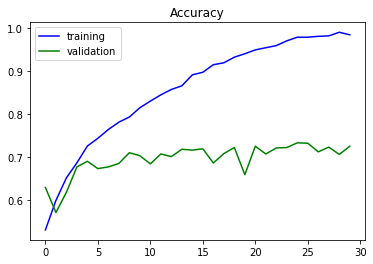

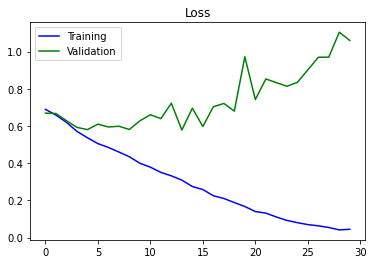

In [34]:
plot(history)

`El error en el set de training disminuye hata valores muy bajos ~0, pero en el conjunto de validación aumenta, por lo tanto el modelo está sobre ajustando los datos.`

Prueba a optimizar la red. Para ello puedes utilizar las herramientas utilizadas en clase. Puedes probar a optimizar en términos de velocidad y de accuracy. Comenta los resultados.

## Agregando drop out

Vamos a agregar un drop out del 50% a las neuronas de la capa densa para solucionar el problema de sobre ajuste del modelo.

In [43]:
#Drop Out
model_DO = models.Sequential()
model_DO.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model_DO.add(layers.MaxPooling2D((2, 2)))
model_DO.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_DO.add(layers.MaxPooling2D((2, 2)))
model_DO.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_DO.add(layers.MaxPooling2D((2, 2)))
model_DO.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_DO.add(layers.MaxPooling2D((2, 2)))

model_DO.add(layers.Flatten())
model_DO.add(layers.Dropout(0.5))
model_DO.add(layers.Dense(512, activation='relu'))
model_DO.add(layers.Dense(1, activation='sigmoid'))
 

In [22]:
model_DO.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [23]:
history_DO = model_DO.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 49s 491ms/step - loss: 0.6926 - acc: 0.5175 - val_loss: 0.6808 - val_acc: 0.5750
Epoch 2/30
100/100 [==============================] - 43s 428ms/step - loss: 0.6751 - acc: 0.5725 - val_loss: 0.6680 - val_acc: 0.5660
Epoch 3/30
100/100 [==============================] - 43s 430ms/step - loss: 0.6467 - acc: 0.6150 - val_loss: 0.6748 - val_acc: 0.5740
Epoch 4/30
100/100 [==============================] - 43s 430ms/step - loss: 0.6161 - acc: 0.6630 - val_loss: 0.6314 - val_acc: 0.6230
Epoch 5/30
100/100 [==============================] - 43s 431ms/step - loss: 0.5804 - acc: 0.6995 - val_loss: 0.6054 - val_acc: 0.6510
Epoch 6/30
100/100 [==============================] - 43s 429ms/step - loss: 0.5513 - acc: 0.7170 - val_loss: 0.5914 - val_acc: 0.6790
Epoch 7/30
100/100 [==============================] - 44s 435ms/step - loss: 0.5340 - acc: 0.7240 - val_loss: 0.6192 - val_acc: 0.6670
Epoch 8/30
100/100 [==============================] - 4

In [30]:
#model_DO.save('cats_dogs_DO.h5')

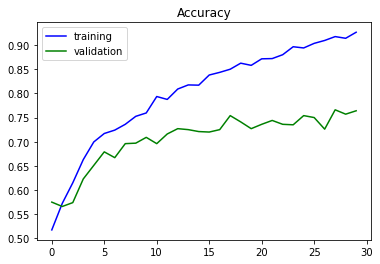

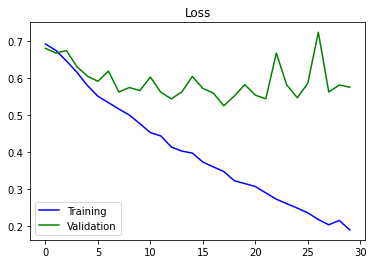

In [35]:
plot(history_DO)

`En este caso podemos apreciar que el "accuracy" del modelo en el conjunto de validación ha subido un poco, pero si miramos la gráfica del error, podemos observar que el modelo todavía sobreajusta los datos.`

In [25]:
#Evaluamos el modelo en el conjunto de test:
test_loss, test_acc = model_DO.evaluate(test_generator)

50/50 [==============================] - 5s 97ms/step - loss: 0.6184 - acc: 0.7520


`La performance en el conjunto de test ha mejorado un poco`

## Drop Out y aumento de datos

Volveré a considerar el modelo pero con un aumento de datos, es decir rotaciones de 0 a 40º, desplazamientos horizontales y verticales, deformaciones diagonales, zooms, etc... 

In [15]:
#Drop Out y aumento de datos
model_AD = models.Sequential()
model_AD.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model_AD.add(layers.MaxPooling2D((2, 2)))
model_AD.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_AD.add(layers.MaxPooling2D((2, 2)))
model_AD.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_AD.add(layers.MaxPooling2D((2, 2)))
model_AD.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_AD.add(layers.MaxPooling2D((2, 2)))

model_AD.add(layers.Flatten())
model_AD.add(layers.Dropout(0.5))
model_AD.add(layers.Dense(512, activation='relu'))
model_AD.add(layers.Dense(1, activation='sigmoid'))
 

In [16]:
model_AD.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [17]:
train_datagen_AD = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40, #rango de rotación aleatoria de imágenes (0-40)
                                  width_shift_range=0.2, #rango de traslacion aleatoria horizonal (0-0.2*width)
                                  height_shift_range=0.2, #rango de traslacion aleatoria vertical (0-0.2*width)
                                  shear_range=0.2, #rango de ángulos de corte aleatorios  (0-0.2)
                                  zoom_range=0.2, #rango de aumento de imágenes (0-0.2%)
                                  horizontal_flip=True,) #se voltea aleatoriamente la mitad de las imágenes

test_datagen_AD = ImageDataGenerator(rescale=1./255)
 
train_generator_AD = train_datagen_AD.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
 
validation_generator_AD = test_datagen_AD.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_generator_AD = test_datagen_AD.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
    
    
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
from tensorflow.keras.callbacks import TensorBoard

In [23]:
tensorboardDenso = TensorBoard(log_dir=base_dir+'\\logs\\denso')

history_AD = model_AD.fit_generator(
      train_generator_AD,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator_AD,
      validation_steps=50,
      callbacks=[tensorboardDenso])

Epoch 1/100
100/100 [==============================] - 78s 784ms/step - loss: 0.6916 - acc: 0.5170 - val_loss: 0.6890 - val_acc: 0.5360
Epoch 2/100
100/100 [==============================] - 76s 761ms/step - loss: 0.6883 - acc: 0.5440 - val_loss: 0.6941 - val_acc: 0.5230
Epoch 3/100
100/100 [==============================] - 76s 755ms/step - loss: 0.6800 - acc: 0.5675 - val_loss: 0.6581 - val_acc: 0.6140
Epoch 4/100
100/100 [==============================] - 75s 747ms/step - loss: 0.6672 - acc: 0.5900 - val_loss: 0.6405 - val_acc: 0.6160
Epoch 5/100
100/100 [==============================] - 75s 750ms/step - loss: 0.6586 - acc: 0.5945 - val_loss: 0.6265 - val_acc: 0.6450
Epoch 6/100
100/100 [==============================] - 73s 731ms/step - loss: 0.6564 - acc: 0.6030 - val_loss: 0.7439 - val_acc: 0.5310
Epoch 7/100
100/100 [==============================] - 75s 751ms/step - loss: 0.6486 - acc: 0.6180 - val_loss: 0.6239 - val_acc: 0.6430
Epoch 8/100
100/100 [===========================

In [31]:
model_AD.save('cats_dogs_AD.h5')

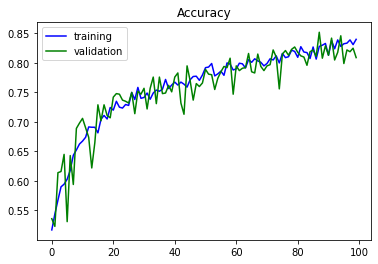

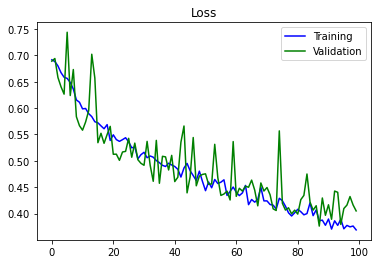

In [27]:
plot(history_AD)

`En este caso el modelo funciona mucho mejor, el "accuracy" en el dataset de validación ha aumentado y crece junto con el "accuracy" en el conjunto de train. Por otro lado el error tiene una tendencia claramente decreciente en ambos conjuntos lo que significa que el modelo no está sobre ajustando los datos.`

In [28]:
#Evalúo el modelo en el conjunto de test
test_loss, test_acc = model_AD.evaluate(test_generator_AD)

50/50 [==============================] - 8s 158ms/step - loss: 0.4348 - acc: 0.8240


`La taza de acierto en el conjunto de test es esta vez mayor al 80 %`

## Referencias

Además de los recursos de clases he utilizado las siguientes fuentes: 
- https://www.youtube.com/watch?v=DbwKbsCWPSg
- https://programmerclick.com/article/5801219229/